https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35

In [1]:
import pandas as pd

In [2]:
url = "https://finance.naver.com/sise/sise_group_detail.nhn?type=upjong&no=35"

In [3]:
table = pd.read_html(url, encoding="cp949")
len(table)

3

In [4]:
df = table[2].dropna(how="all")
df = df.dropna(axis=1)
df.shape

(137, 9)

In [5]:
import datetime

today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2020-10-21'

In [6]:
df["조회일자"] = today

In [7]:
df.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,KPX생명과학 *,11800.0,2700.0,+29.67%,11800.0,0.0,29910987.0,318188.0,26376873.0,2020-10-21
2,유유제약2우B,40100.0,6100.0,+17.94%,40100.0,40450.0,12355.0,464.0,5424.0,2020-10-21
3,에이치엘비생명과학 *,28050.0,2950.0,+11.75%,28050.0,28100.0,8090751.0,226436.0,1207170.0,2020-10-21
4,서울제약 *,11400.0,950.0,+9.09%,11400.0,11450.0,1110355.0,12342.0,589471.0,2020-10-21
5,신풍제약,135500.0,10000.0,+7.97%,135000.0,135500.0,3408908.0,456830.0,1100126.0,2020-10-21


In [8]:
import matplotlib.pyplot as plt

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("ggplot")

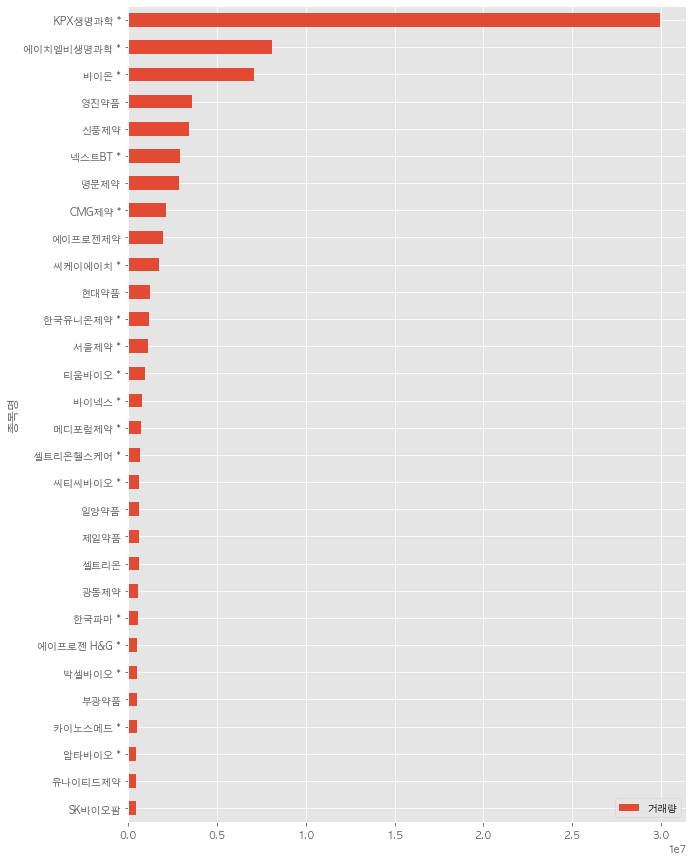

In [9]:
vol = df[["종목명", "거래량"]]
vol = vol.set_index("종목명")
vol.sort_values(by=["거래량"]).tail(30).plot.barh(figsize=(10, 15))

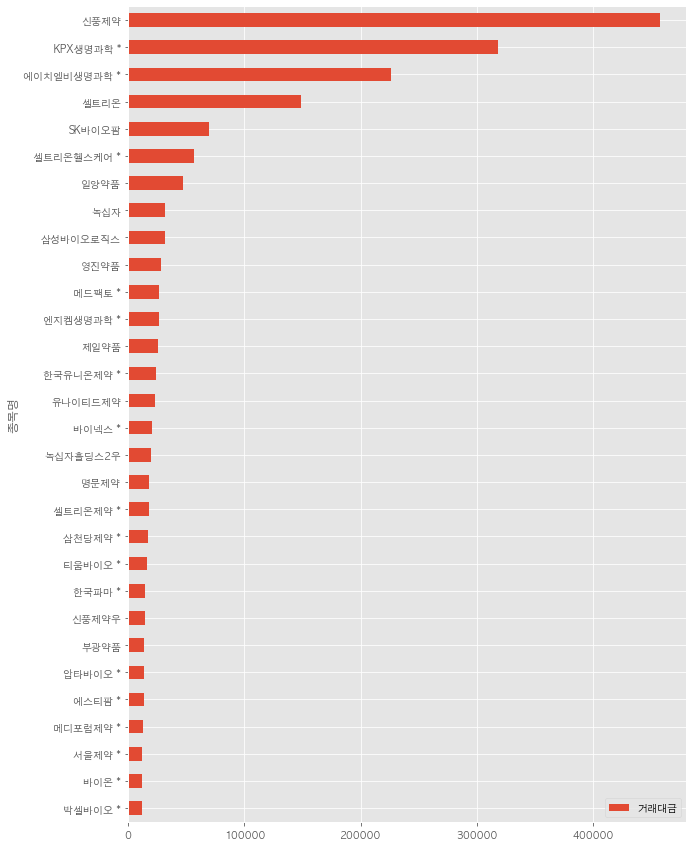

In [10]:
price = df[["종목명", "거래대금"]]
price = price.set_index("종목명")
price.sort_values(by=["거래대금"]).tail(30).plot.barh(figsize=(10, 15))

## 종목코드 수집

In [11]:
import requests
from bs4 import BeautifulSoup as bs

In [12]:
response = requests.get(url)

In [13]:
html = bs(response.text, "lxml")

In [14]:
table_2 = html.select("table")[2]

In [15]:
a_tags = table_2.select("a")

In [16]:
a_tags[0]["href"].split("=")[-1]

'114450'

In [17]:
item_list = []
for a_tag in a_tags:
    item_code = a_tag["href"].split("=")[-1]
    item_list.append(item_code)

In [18]:
df.shape

(137, 10)

In [19]:
item_code_list = pd.Series(item_list).drop_duplicates()
item_code_list = item_code_list.tolist()

In [20]:
len(item_code_list)

137

In [21]:
df["종목코드"] = item_code_list

In [22]:
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목코드
1,KPX생명과학 *,11800.0,2700.0,+29.67%,11800.0,0.0,29910987.0,318188.0,26376873.0,2020-10-21,114450
2,유유제약2우B,40100.0,6100.0,+17.94%,40100.0,40450.0,12355.0,464.0,5424.0,2020-10-21,000227
3,에이치엘비생명과학 *,28050.0,2950.0,+11.75%,28050.0,28100.0,8090751.0,226436.0,1207170.0,2020-10-21,067630
4,서울제약 *,11400.0,950.0,+9.09%,11400.0,11450.0,1110355.0,12342.0,589471.0,2020-10-21,018680
5,신풍제약,135500.0,10000.0,+7.97%,135000.0,135500.0,3408908.0,456830.0,1100126.0,2020-10-21,019170
...,...,...,...,...,...,...,...,...,...,...,...
133,한국유니온제약 *,20150.0,800.0,-3.82%,20150.0,20200.0,1168753.0,24374.0,2701114.0,2020-10-21,080720
134,옵티팜 *,18800.0,800.0,-4.08%,18750.0,18800.0,50807.0,972.0,93644.0,2020-10-21,153710
135,박셀바이오 *,22250.0,1350.0,-5.72%,22250.0,22350.0,516022.0,11883.0,1853601.0,2020-10-21,323990
136,엔지켐생명과학 *,97700.0,6400.0,-6.15%,97700.0,97800.0,270900.0,26575.0,119553.0,2020-10-21,183490


## 종목상세정보

'종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
'외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
'추정PERlEPS', '동일업종 PER', '동일업종 등락률', '배당수익률'

In [23]:
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
item_url

'https://finance.naver.com/item/main.nhn?code=005257'

In [24]:
tables = pd.read_html(item_url, encoding="cp949")
len(tables)

13

In [25]:
tables[5]

,0,1
0,시가총액,"1,193 억원"
1,시가총액순위,코스피 666위
2,상장주식수,845990
3,액면가l매매단위,500원 l 1주


In [26]:
# 컬럼의 수가 2인 테이블만 따로 list로 생성
item_info = []
for table in tables:
    if table.shape[1] == 2:
        item_info.append(table)

In [27]:
# 리스트의 값 확인
item_info

[          0            1
 0      시가총액    1,193  억원
 1    시가총액순위     코스피 666위
 2     상장주식수       845990
 3  액면가l매매단위  500원  l  1주,
              0       1
 0  외국인한도주식수(A)  845990
 1  외국인보유주식수(B)     865
 2  외국인소진율(B/A)   0.10%,
            0                   1
 0  투자의견l목표주가         N/A  l  N/A
 1   52주최고l최저  287,000  l  12,350,
                    0                  1
 0   PERlEPS(2020.06)   200.28배  l  704원
 1          추정PERlEPS        N/A  l  N/A
 2  PBRlBPS (2020.06)  8.32배  l  16,937원
 3      배당수익률l2019.12              0.23%,
           0       1
 0  동일업종 PER  92.70배
 1  동일업종 등락률  +1.07%]

In [28]:
df_item = pd.concat(item_info)
df_item.set_index(0).T

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률l2019.12,동일업종 PER,동일업종 등락률
1,"1,193 억원",코스피 666위,845990,500원 l 1주,845990,865,0.10%,N/A l N/A,"287,000 l 12,350",200.28배 l 704원,N/A l N/A,"8.32배 l 16,937원",0.23%,92.70배,+1.07%


In [29]:
import time
def get_item_info(item_code):
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    tables = pd.read_html(item_url, encoding="cp949")
    # 컬럼의 수가 2인 테이블만 따로 list로 생성
    item_info = []
    for table in tables:
        if table.shape[1] == 2:
            item_info.append(table)
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    df_item["종목코드"] = item_code
    time.sleep(0.5)
    return df_item

In [30]:
get_item_info(item_code)

,시가총액,시가총액순위,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2020.06),추정PERlEPS,PBRlBPS (2020.06),배당수익률l2019.12,동일업종 PER,동일업종 등락률,종목코드
1,"1,193 억원",코스피 666위,845990,500원 l 1주,845990,865,0.10%,N/A l N/A,"287,000 l 12,350",200.28배 l 704원,N/A l N/A,"8.32배 l 16,937원",0.23%,92.70배,+1.07%,005257


In [31]:
from tqdm import tqdm, tqdm_pandas

tqdm_pandas(tqdm)


/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [32]:
result = df["종목코드"].progress_apply(get_item_info)

100%|██████████| 137/137 [02:03<00:00,  1.11it/s]


In [33]:
df_item_info = pd.concat(result.tolist())

In [34]:
df_info = df.merge(df_item_info)

In [35]:
df_info.shape

(137, 37)

In [36]:
df_info.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,PERlEPS(2019.12),PBRlBPS (2019.12),PERlEPS(2020.03),PBRlBPS (2020.03),PERlEPS(2018.12),PBRlBPS (2018.12),배당수익률l2020.06,PERlEPS(2020.08),PBRlBPS (2020.08),배당수익률l2019.11
0,KPX생명과학 *,11800.0,2700.0,+29.67%,11800.0,0.0,29910987.0,318188.0,26376873.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,유유제약2우B,40100.0,6100.0,+17.94%,40100.0,40450.0,12355.0,464.0,5424.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,에이치엘비생명과학 *,28050.0,2950.0,+11.75%,28050.0,28100.0,8090751.0,226436.0,1207170.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,서울제약 *,11400.0,950.0,+9.09%,11400.0,11450.0,1110355.0,12342.0,589471.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,신풍제약,135500.0,10000.0,+7.97%,135000.0,135500.0,3408908.0,456830.0,1100126.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_info.columns

Index(['종목명', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '조회일자', '종목코드', '시가총액', '시가총액순위', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
       '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       'PERlEPS(2020.06)', '추정PERlEPS', 'PBRlBPS (2020.06)', '배당수익률',
       '동일업종 PER', '동일업종 등락률', '배당수익률l2019.12', 'PERlEPS(2019.12)',
       'PBRlBPS (2019.12)', 'PERlEPS(2020.03)', 'PBRlBPS (2020.03)',
       'PERlEPS(2018.12)', 'PBRlBPS (2018.12)', '배당수익률l2020.06',
       'PERlEPS(2020.08)', 'PBRlBPS (2020.08)', '배당수익률l2019.11'],
      dtype='object')

In [38]:
info_cols = ['종목명', '시가총액', '시가총액순위', '현재가', '전일비', '등락률', '매수호가', '매도호가', '거래량', '거래대금', '전일거래량',
       '조회일자', '종목코드', '상장주식수', '액면가l매매단위', '외국인한도주식수(A)',
       '외국인보유주식수(B)', '외국인소진율(B/A)', '투자의견l목표주가', '52주최고l최저',
       '동일업종 PER', '동일업종 등락률', '배당수익률']

In [39]:
df_info[info_cols].sort_values("시가총액순위")

,종목명,시가총액,시가총액순위,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,...,상장주식수,액면가l매매단위,외국인한도주식수(A),외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,동일업종 PER,동일업종 등락률,배당수익률
33,대성미생물 *,606 억원,코스닥 1041위,15950.0,350.0,+2.24%,15850.0,15950.0,21501.0,338.0,...,3800000,500원 l 1주,3800000,57268,1.51%,N/A l N/A,"20,800 l 8,010",92.70배,+1.07%,NaN
99,내츄럴엔도텍 *,522 억원,코스닥 1110위,2525.0,0.0,0.00%,0.0,0.0,0.0,0.0,...,20665822,500원 l 1주,20665822,702098,3.40%,N/A l N/A,"7,460 l 2,360",92.70배,+1.07%,NaN
24,진바이오텍 *,501 억원,코스닥 1136위,5820.0,170.0,+3.01%,5800.0,5820.0,64613.0,372.0,...,8610587,500원 l 1주,8610587,101385,1.18%,N/A l N/A,"8,380 l 3,180",92.70배,+1.07%,NaN
58,큐브앤컴퍼니 *,473 억원,코스닥 1169위,1450.0,15.0,+1.05%,1450.0,1455.0,220715.0,325.0,...,32590313,500원 l 1주,32590313,177835,0.55%,N/A l N/A,"4,450 l 1,170",92.70배,+1.07%,NaN
38,지엘팜텍 *,438 억원,코스닥 1204위,928.0,18.0,+1.98%,928.0,929.0,99309.0,91.0,...,47210219,100원 l 1주,47210219,937043,1.98%,N/A l N/A,"1,435 l 390",92.70배,+1.07%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,한미약품,"3조 2,331 억원",코스피 76위,273000.0,1000.0,+0.37%,273000.0,273500.0,27756.0,7571.0,...,11843029,"2,500원 l 1주",11843029,1656376,13.99%,"3.64매수 l 343,636","430,000 l 213,500",92.70배,+1.07%,NaN
46,유한양행우,725 억원,코스피 833위,61400.0,900.0,+1.49%,61100.0,61400.0,3932.0,239.0,...,1180940,"1,000원 l 1주",1180940,0,0.00%,"4.00매수 l 76,545","87,000 l 37,300",92.70배,+1.07%,NaN
112,셀트리온,"32조 9,385 억원",코스피 8위,244000.0,1500.0,-0.61%,244000.0,244500.0,608386.0,148266.0,...,134993738,"1,000원 l 1주",134993738,27823686,20.61%,"3.93매수 l 367,357","339,500 l 138,500",92.70배,+1.07%,NaN
128,녹십자,"2조 5,652 억원",코스피 94위,219500.0,7500.0,-3.30%,219500.0,220000.0,143248.0,31652.0,...,11686538,"5,000원 l 1주",11686538,2049561,17.54%,"3.60매수 l 246,200","318,000 l 97,400",92.70배,+1.07%,NaN


In [40]:
df_info.to_csv("pharm_stock.csv", index=False)

In [41]:
pd.read_csv("pharm_stock.csv")

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,...,PERlEPS(2019.12),PBRlBPS (2019.12),PERlEPS(2020.03),PBRlBPS (2020.03),PERlEPS(2018.12),PBRlBPS (2018.12),배당수익률l2020.06,PERlEPS(2020.08),PBRlBPS (2020.08),배당수익률l2019.11
0,KPX생명과학 *,11800.0,2700.0,+29.67%,11800.0,0.0,29910987.0,318188.0,26376873.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,유유제약2우B,40100.0,6100.0,+17.94%,40100.0,40450.0,12355.0,464.0,5424.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,에이치엘비생명과학 *,28050.0,2950.0,+11.75%,28050.0,28100.0,8090751.0,226436.0,1207170.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,서울제약 *,11400.0,950.0,+9.09%,11400.0,11450.0,1110355.0,12342.0,589471.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,신풍제약,135500.0,10000.0,+7.97%,135000.0,135500.0,3408908.0,456830.0,1100126.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,한국유니온제약 *,20150.0,800.0,-3.82%,20150.0,20200.0,1168753.0,24374.0,2701114.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,옵티팜 *,18800.0,800.0,-4.08%,18750.0,18800.0,50807.0,972.0,93644.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,박셀바이오 *,22250.0,1350.0,-5.72%,22250.0,22350.0,516022.0,11883.0,1853601.0,2020-10-21,...,N/A l N/A,N/A l N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,엔지켐생명과학 *,97700.0,6400.0,-6.15%,97700.0,97800.0,270900.0,26575.0,119553.0,2020-10-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
